In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
import plotly.express as px
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на занятии (**1 декабря в 19:00**).  


Вы можете выбирать оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверят ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

Вопросы, на которые нужно ответить в презентации: 
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы и сопроводить выводы релевантной визуализацией. 

Любой хороший аналитик должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите куратору. 

**Вам необходимо разделиться на группы по 2-4 человека и записать состав вашей команды.** Ваше выступление должно длиться примерно 10-15 минут.

## Решение

Скачайте данные: [ссылка](https://drive.google.com/file/d/1-AbKfNo1SuKPQgA4Uo9ULfMjyUtJHLRa/view?usp=sharing). Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Netflix Shows.csv to Netflix Shows.csv


In [ ]:
# код ниже менять нельзя, просто запустите ячейку!
data = pd.read_csv('Netflix Shows.csv', encoding='cp437')
del data['ratingDescription'], data['user rating size']

In [ ]:
data.columns

Index(['title', 'rating', 'ratingLevel', 'release year', 'user rating score'], dtype='object')

In [ ]:
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN


In [ ]:
#data['user rating score'] = data['user rating score']. fillna(method='bfill')

Удалите из данных дупликаты. 

In [ ]:
# data_new=data.drop_duplicates(subset=['title'], keep='first')
data_new=data.drop_duplicates()
data_new#[data_new['title'] == 'Friends']

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


Сколько рейтинговых групп представлено в данных?

In [ ]:
#a=len(pd.unique(data_new['rating']))
#a
data_new['rating'].nunique()

13

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

In [ ]:
data_new['user_rating_group']= pd.cut(data_new['user rating score'],10);


<ipython-input-30-51e0abdad2fe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['user_rating_group']= pd.cut(data_new['user rating score'],10);


Тут разбили на 10 групп для удобочитаемости

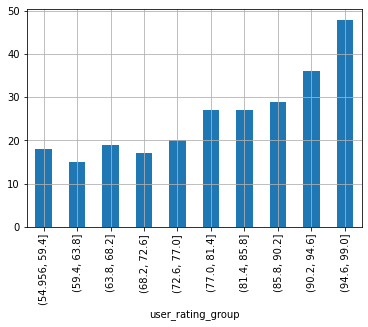

In [ ]:
data_new.groupby('user_rating_group')['title'].count().plot(kind='bar',grid=True);
plt.savefig('ex.png')

In [ ]:
Тут подсветили количество НаНов

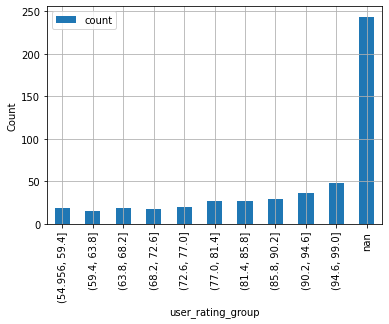

In [ ]:
counts = data_new.groupby('user_rating_group')['title'].size().reset_index(name='count')
nan_count = pd.DataFrame({'user_rating_group': [np.nan], 'count': [data_new['user_rating_group'].isnull().sum()]})
counts = pd.concat([counts, nan_count])
counts.plot(kind='bar', x='user_rating_group', y='count', grid=True)
plt.xlabel('user_rating_group')
plt.ylabel('Count')
plt.show()

***Вывод:*** Чаще всего зрители в восторге от потребляемого контента, как видно из первой гистограммы.Но если включить сюда количество контента без оценок, все становится не так уж и радужно.Необходимо разобраться в причинах отсутствия данных.

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
data_new.agg({'user rating score': ['mean','std', 'min', 'max', 'median']})

,user rating score
mean,81.398438
std,12.730904
min,55.000000
max,99.000000
median,83.500000


***Ответ:*** Медиана отличается от среднего. Медиана- центральное число в отсортированном наборе данных, а среднее-это сдеднее значение этих данных.Выбросы могут значительно влиять на среднее значение,а медиана останется на месте


В какие годы были запущены шоу, представленные в датасете?

In [ ]:
group = data_new.groupby(['release year'])['title'].count().reset_index(name='count')
group

,release year,count
0,1940,1
1,1976,1
2,1978,1
3,1982,2
4,1986,1
5,1987,1
6,1989,2
7,1990,2
8,1991,1
9,1992,1


Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

Теперь посмотрим на выброс.

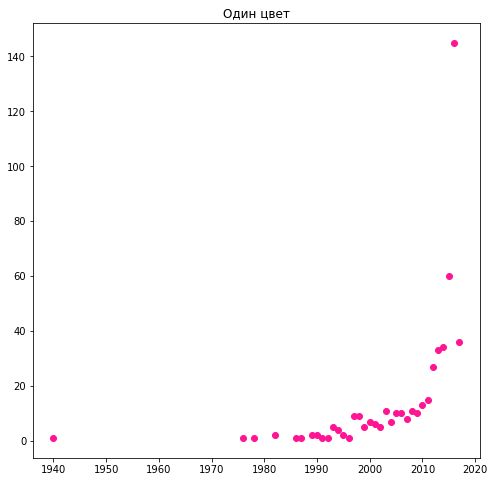

In [ ]:
x = group['release year']    
y = group['count']    
fig, ax = plt.subplots()
ax.scatter(x, y,c = 'deeppink') 
ax.set_facecolor('white')     
ax.set_title('Один цвет')     
fig.set_figwidth(8)    
fig.set_figheight(8)    
plt.show()

***Вывод:*** Согласно общепринятому понятию "Выброс" им можно считать все,что было в 1940,2015,2016 гг.Но все-таки логичнее предположить,что этот график показывает динамику развития компании, а в данные закралась ошибка: это не годы запуска на платформе,а годы выпуска фильмов.Плюс у нас неполные данные таблицы обрываются в июне 2017 г.

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)  
Ответить на этот вопрос вам поможет график, который вы построили выше.



In [ ]:
mrg= data_new.where((data_new['release year'] == 2016) | (data_new['release year'] == 2017)).groupby('release year')['user rating score'].mean().round(0)
mrg


release year
2016.0    84.0
2017.0    88.0
Name: user rating score, dtype: float64

In [ ]:
data_new['user rating score'] = data_new['user rating score'].astype('Int64')
df = data_new[data_new['user rating score'].notna()]
df.columns

<ipython-input-15-16a290f0a3b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['user rating score'] = data_new['user rating score'].astype('Int64')


Index(['title', 'rating', 'ratingLevel', 'release year', 'user rating score',
       'user_rating_group'],
      dtype='object')

In [ ]:
df1= df.loc[(df['release year']==2016),['title', 'rating', 'ratingLevel', 'release year', 'user rating score',
       'user_rating_group']]



In [ ]:
df2= df.loc[(df['release year']==2017),['title', 'rating', 'ratingLevel', 'release year', 'user rating score',
       'user_rating_group']]

In [ ]:

from scipy.stats import ttest_ind

df_2016 = df1
df_2017 = df2

t, p = ttest_ind(df1['user rating score'], df2['user rating score'], equal_var=True)
print("t =", t, ", p =", p)

t = -1.1585175998599906 , p = 0.24941209189696556


***Вывод:*** Учитывая большое количество контента без оценок и неполные данные за 2017 год не считаю возможным достоверно утверждать,что 2017 год успешнее 2016 г.Но.. аналитики любят все считать и сравнивать.Если обратиться к статистике (я в ней не очень силен,но исправляюсь) и применить t тест, могу утверждать,что такое вполне возможно)))

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

In [ ]:
group_rating = data_new.groupby(['rating'])['title'].count().reset_index(name='count')
group_rating

,rating,count
0,G,53
1,NR,10
2,PG,75
3,PG-13,12
4,R,14
5,TV-14,106
6,TV-G,29
7,TV-MA,80
8,TV-PG,32
9,TV-Y,36


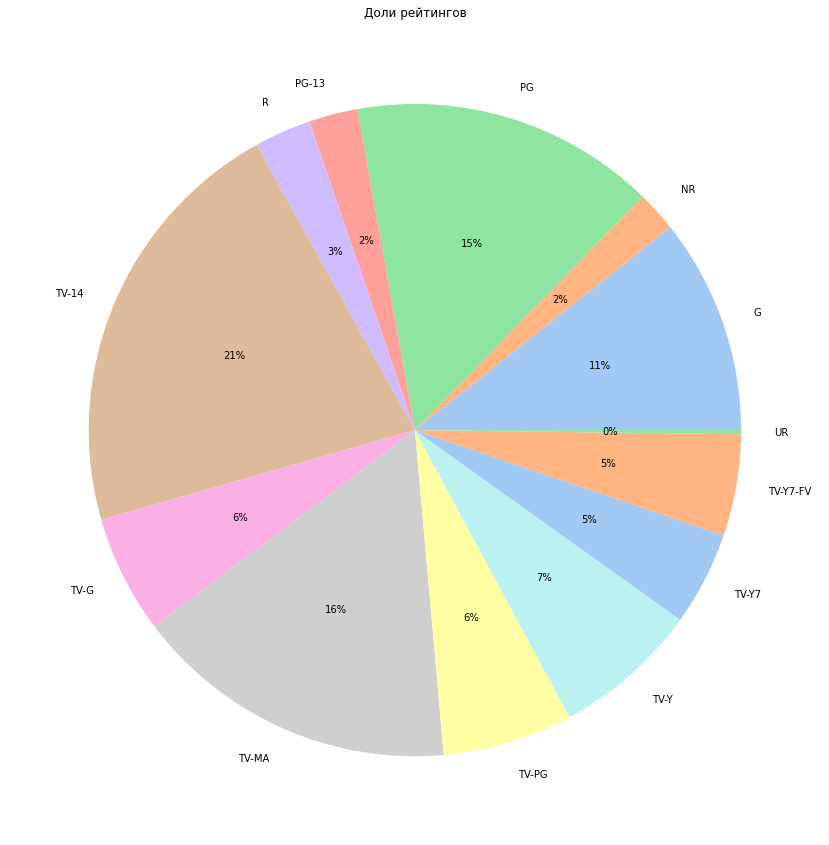

In [ ]:
fig, ax = plt.subplots(figsize=(20,15)) 
colors = sns.color_palette('pastel')[ 0:13 ]
ax.pie(group_rating['count'], labels = group_rating['rating'], colors = colors, autopct='%.0f%%') 
ax.set_title('Доли рейтингов') 
labels = ['G', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']
# ax.legend(handles, labels, loc='best')
plt.show() 

***Вывод:*** Детей перед телеком,где показывают фильмы Нетфликс,лучше одних не оставлять

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

***Вывод:*** ...

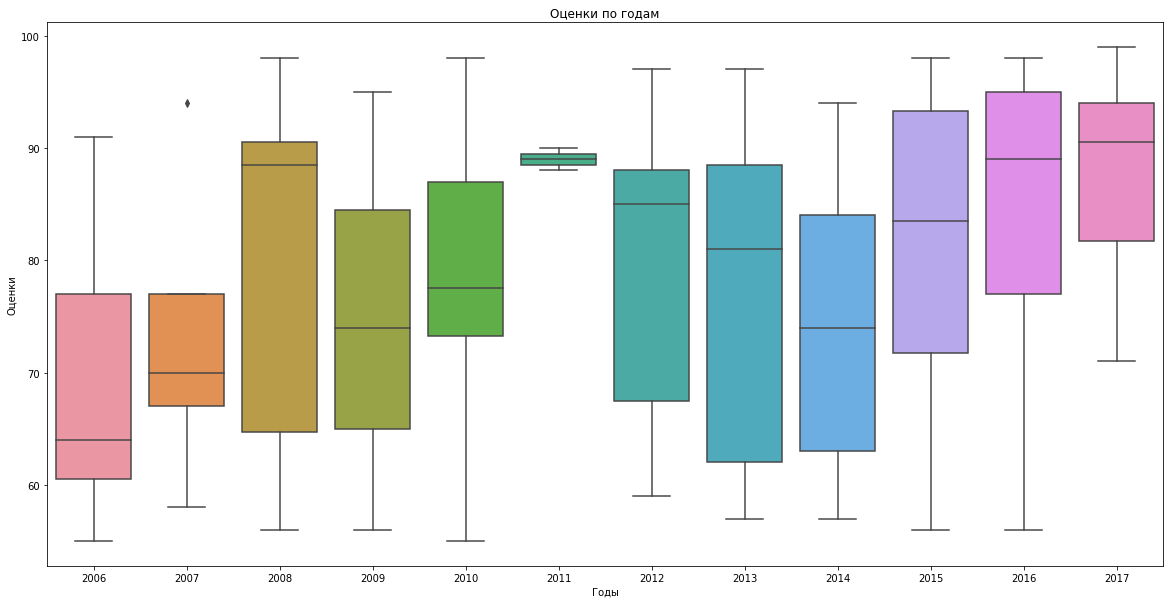

In [ ]:
df = data_new[(data_new['release year'] >= 2006) & (data_new['release year'] <= 2017)]
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x='release year', y='user rating score', data=df)
plt.xlabel('Годы')
plt.ylabel('Оценки')
ax.set_title('Оценки по годам')
plt.show()

''

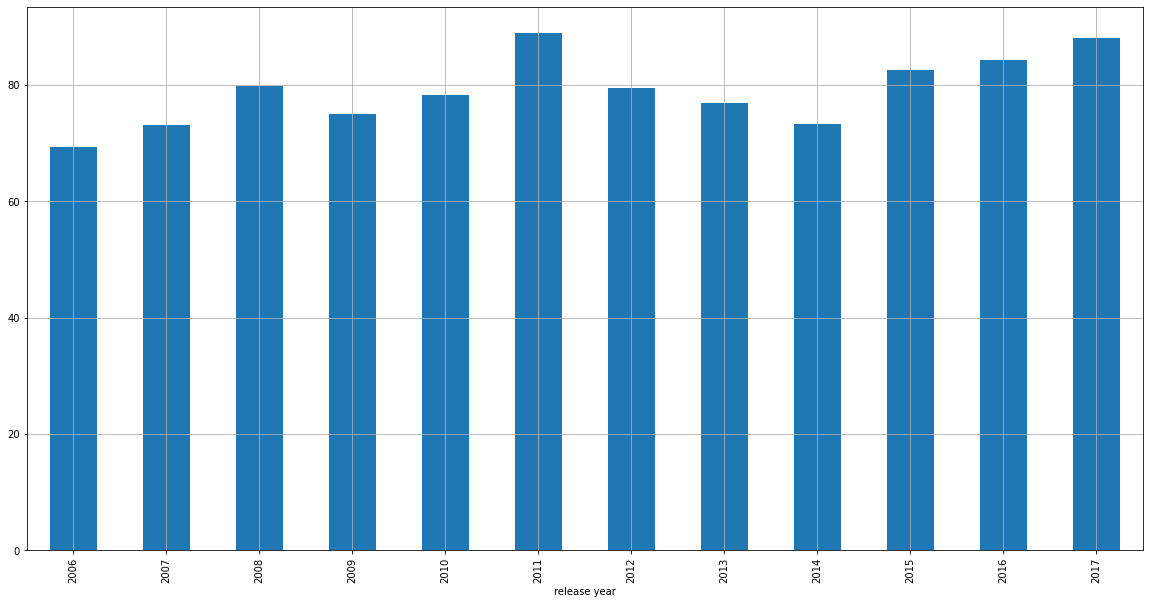

In [ ]:
df.groupby(['release year'])['user rating score'].mean().plot(kind='bar',grid=True, figsize=(20, 10))
;


тут тоже самое с оценками,но менее информативно

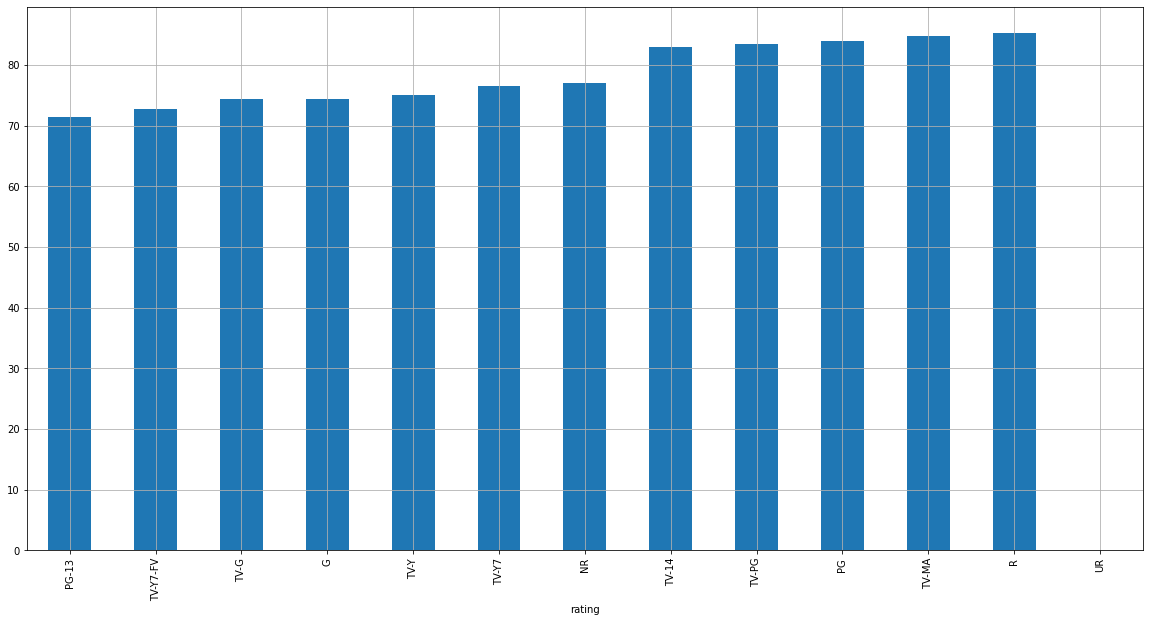

In [ ]:
data_new.groupby(['rating'])['user rating score'].mean().sort_values().plot(kind='bar', grid=True, figsize=(20, 10));

Среднии оценки по рейтингам

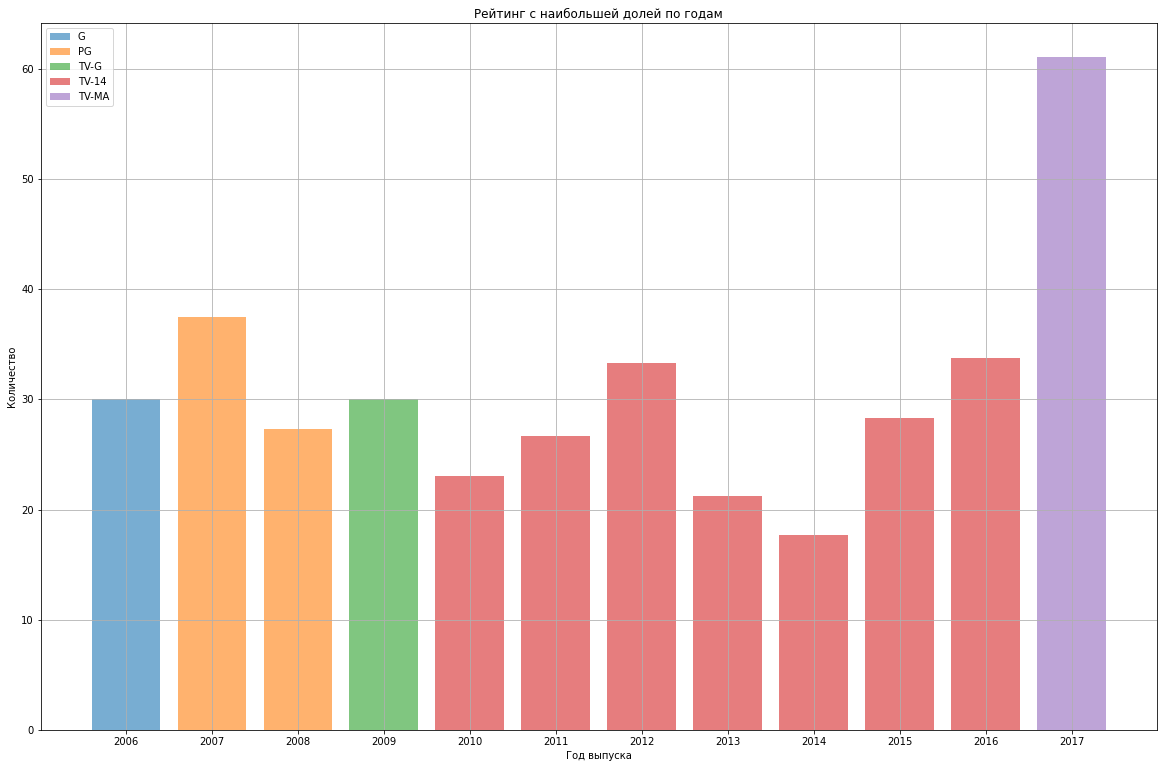

In [ ]:
grouped = df.groupby(['release year', 'rating'])['title'].count().reset_index().sort_values(['release year', 'title'], ascending=[True, False])
grouped['total_count'] = grouped.groupby(['release year'])['title'].transform('sum')
grouped['%'] = (grouped['title']*100 / grouped['total_count']).round(2)
top3 = pd.DataFrame()
for i in grouped['release year'].unique():
    top3 = top3.append(grouped[grouped['release year'] == i].head(1))
top3
fig, ax = plt.subplots(figsize=(20, 13))
for i, rating in enumerate(top3['rating'].unique()):
    ax.bar(top3[top3['rating'] == rating]['release year'], top3[top3['rating'] == rating]['%'], alpha=0.6, label=rating)
ax.set_xticks(top3['release year'].unique())
ax.legend()
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество')
ax.set_title('Рейтинг с наибольшей долей по годам')
plt.grid(True)
plt.show()




In [ ]:
top3

,release year,rating,title,total_count,%
0,2006,G,3,10,30.00
2,2006,PG-13,2,10,20.00
4,2006,TV-14,2,10,20.00
6,2007,PG,3,8,37.50
9,2007,TV-Y,2,8,25.00
7,2007,TV-G,1,8,12.50
11,2008,PG,3,11,27.27
14,2008,TV-PG,3,11,27.27
12,2008,PG-13,1,11,9.09
20,2009,TV-G,3,10,30.00


In [ ]:
def age_category(rating):
  if rating in ['NR','R','TV-MA','UR']:
    return 'Взрослое'
  elif rating in ['PG-13','TV-14','PG']:
    return 'Подростки'
  else:
    return 'Детское';
data_new['category']=data_new['rating'].apply(age_category);
group_rating = data_new.groupby(['category'])['title'].count().reset_index(name='count');
group_rating

<ipython-input-87-a7def13c379b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['category']=data_new['rating'].apply(age_category);


,category,count
0,Взрослое,105
1,Детское,198
2,Подростки,193


In [ ]:
data_new['category']=data_new['rating'].apply(age_category);
data_new

<ipython-input-88-6b554724bff0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['category']=data_new['rating'].apply(age_category);


,title,rating,ratingLevel,release year,user rating score,user_rating_group,category
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82,"(81.4, 85.8]",Подростки
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,<NA>,NaN,Взрослое
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98,"(94.6, 99.0]",Подростки
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98,"(94.6, 99.0]",Подростки
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94,"(90.2, 94.6]",Детское
...,...,...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,<NA>,NaN,Подростки
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,<NA>,NaN,Детское
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,<NA>,NaN,Детское
997,Precious Puppies,TV-G,Suitable for all ages.,2003,<NA>,NaN,Детское


In [ ]:
group_rating = data_new.groupby(['category'])['title'].count().reset_index(name='count')
group_rating

,category,count
0,Взрослое,105
1,Детское,198
2,Подростки,193


In [ ]:
group_rating = data_new.groupby(['category'])['user rating score'].max().reset_index(name='max')
group_rating

,category,max
0,Взрослое,99
1,Детское,98
2,Подростки,98


In [ ]:
id_title = data_new.groupby(['category'])['user rating score'].idxmax()
max_rating = data_new.loc[id_title, ['category', 'title', 'user rating score']]
max_rating

,category,title,user rating score
41,Взрослое,13 Reasons Why,99
10,Детское,Once Upon a Time,98
2,Подростки,Grey's Anatomy,98


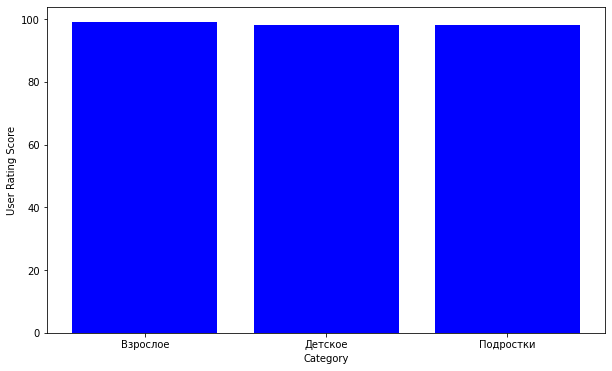

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(max_rating['category'], max_rating['user rating score'], color='b')
ax.set_xlabel('Category')
ax.set_ylabel('User Rating Score')
plt.show()

In [ ]:
df_once = pd.DataFrame({'Год': [2011, 2012, 2013, 2014, 2015, 2016, 2017],
                   'Колличество зрителей': [11.71, 10.24, 9.38, 8.98, 6.32, 4.39,3.41],
                   })

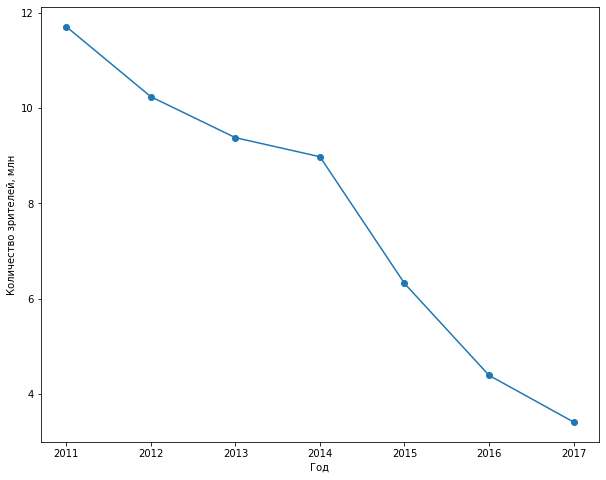

In [ ]:
x = df_once['Год']    
y = df_once['Колличество зрителей'] 
plt.figure(figsize=(10, 8))   
plt.xlabel('Год')
plt.ylabel('Количество зрителей, млн')
plt.plot(x,y,'-o')

In [ ]:
df_Anatomy = pd.DataFrame({'Год': [2005, 2006,2007,2008,2009,2010, 2011, 2012, 2013, 2014, 2015, 2016],
                   'Колличество зрителей': [18.46, 19.84, 19.22, 15.92, 14.52, 13.25,11.41,10.92,11.07,12.12,11.08,11.21],
                   })

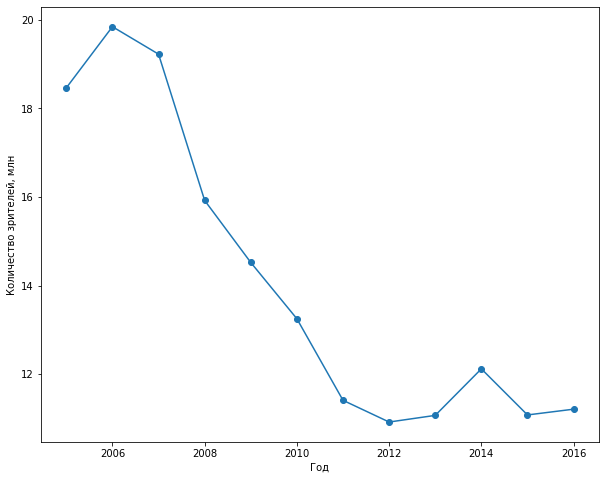

In [ ]:
x = df_Anatomy['Год']    
y = df_Anatomy['Колличество зрителей'] 
plt.figure(figsize=(10, 8))   
plt.xlabel('Год')
plt.ylabel('Количество зрителей, млн')
plt.plot(x,y,'-o')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving once_D.xlsx to once_D.xlsx


In [ ]:
df_once = pd.read_excel('once_D.xlsx')

In [ ]:
df_once

,number,season,count
0,1,1,12.93
1,2,1,11.74
2,3,1,11.45
3,4,1,11.36
4,5,1,10.66
...,...,...,...
151,18,7,2.12
152,19,7,1.98
153,20,7,1.98
154,21,7,2.26


In [ ]:
pivot_df = df_once.pivot( index='season', columns='number', values='count')
pivot_df

number,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
season,,,,,,,,,,,,,,,,,,,,,
1,12.93,11.74,11.45,11.36,10.66,9.61,8.91,10.35,9.83,9.33,...,10.67,9.29,8.69,8.82,8.36,9.08,9.20,8.95,9.60,NaN
2,11.36,9.84,9.45,9.89,9.85,10.15,8.75,8.82,9.10,9.10,...,7.61,7.39,7.64,7.45,7.38,7.37,7.16,7.50,7.20,NaN
3,8.52,8.00,7.53,7.05,7.23,7.55,6.71,6.66,6.64,6.94,...,6.91,6.64,7.26,6.50,5.95,6.91,6.69,6.80,6.80,NaN
4,9.47,8.78,7.92,8.07,6.87,7.54,7.42,6.80,6.80,6.43,...,6.72,5.88,5.79,5.48,5.17,5.12,5.21,5.31,5.51,5.51
5,5.93,5.38,5.28,4.92,5.12,4.83,4.88,4.85,4.85,4.38,...,3.54,3.51,3.78,3.75,3.76,3.85,3.77,3.75,4.07,4.07
6,3.99,3.72,4.11,3.53,3.40,3.06,3.56,3.40,3.28,3.27,...,2.85,2.80,2.60,2.51,2.69,3.05,2.87,2.95,2.95,NaN
7,3.26,2.74,2.49,2.44,2.29,2.37,2.28,2.28,2.45,2.29,...,2.11,2.03,2.15,2.18,2.12,1.98,1.98,2.26,2.27,NaN


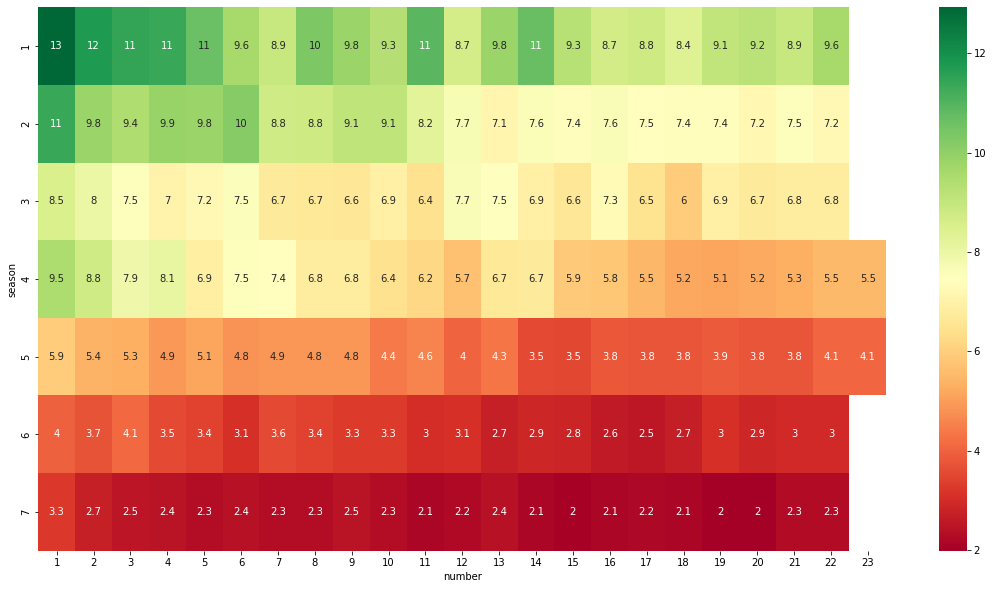

In [ ]:
fig, ax = plt.subplots(figsize=(19,10))
sns.heatmap(pivot_df, cmap='RdYlGn', annot=True, ax=ax) 
plt.show()